# Knowing and getting insight into the data

###### in this project, We are going to pull the data from internet and we are deep dive into the data to getting best insight

## Import the libraries we will use

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data

In [4]:
url= 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

In [51]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,No Data,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [8]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
 5   Revenue             4622 non-null   object
 6   revenue             4622 non-null   object
dtypes: int64(2), object(5)
memory usage: 252.9+ KB


## Exploraing the data (Any Duplicates, Errors, Nulls, DType)

In [9]:
Check = chipo.isnull() #Check any Null values
Sum = Check.sum()  #Sum if have nulls
print(Sum) 

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
Revenue                  0
revenue                  0
dtype: int64


In [10]:
chipo.replace(np.nan, "No Data", inplace=True) #Replace the null values                         
chipo.isnull().sum() #checking

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
Revenue               0
revenue               0
dtype: int64

In [11]:
chipo.duplicated(subset= 'order_id') #it must be unique

0       False
1        True
2        True
3        True
4       False
        ...  
4617    False
4618     True
4619    False
4620     True
4621     True
Length: 4622, dtype: bool

In [12]:
# remove the duplicates
chipo.drop_duplicates(subset= 'order_id', inplace= True)
chipo.duplicated(subset= 'order_id') #for checking 

0       False
4       False
5       False
7       False
9       False
        ...  
4610    False
4612    False
4615    False
4617    False
4619    False
Length: 1834, dtype: bool

In [13]:
chipo.item_price.dtype # Check data Type

dtype('O')

In [14]:
# Solution 1
dollarRemove = lambda x: float(x[1 :-1])
chipo.item_price = chipo.item_price.apply(dollarRemove)
#------------# Solution 2--------------
#chipo['item_price']= chipo['item_price'].str.replace('$', '', regex= False) #Remove "$" 
#chipo['item_price'].astype(float) #Convert

In [15]:
print(chipo.dtypes['item_price'])

float64


## Which was the most-ordered item?

In [16]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description', 'item_price',
       'Revenue', 'revenue'],
      dtype='object')

In [17]:
#Step By Step to simply understand
M_o_I = chipo.groupby(['item_price'])
M_o_I = M_o_I.sum()
M_o_I = M_o_I.sort_values(['quantity'], ascending= False)
M_o_I.head(1)

,order_id,quantity,item_name,choice_description,Revenue,revenue
item_price,,,,,,
8.75,380306,381,Chicken Crispy TacosChicken BowlChicken Soft T...,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75 $8.75 $8.75 $8.75 $8.75 $8.75 $8.75 $8.7...,$8.75 $8.75 $8.75 $8.75 $8.75 $8.75 $8.75 $8.7...


## How much was the revenue for the period in the dataset?


In [66]:
## Revenue = (Total quantitiy * total price).sum() 
Revenue = (chipo['quantity'] * chipo['item_price']).sum() 
print(f'Revenue is: {Revenue: .2f}')

Revenue is:  20732.91


## How many orders were made in the period?


In [25]:
Total_Order = chipo['order_id']
Total_Order = Total_Order.count()
print(Total_Order)

1834


In [24]:
totalItem = chipo.quantity.sum()
totalItem

1993

## What is the average revenue amount per order?


In [45]:
chipo['Revenue'] = chipo['quantity'] * chipo['item_price']
order_Grouped = chipo.groupby(by=['order_id']).sum()
average_revenue = order_Grouped['Revenue'].mean()
print(f"Revenue avg per order is: {average_revenue:.2f}")

Revenue avg per order is: 11.30


## Total Revenue per Item

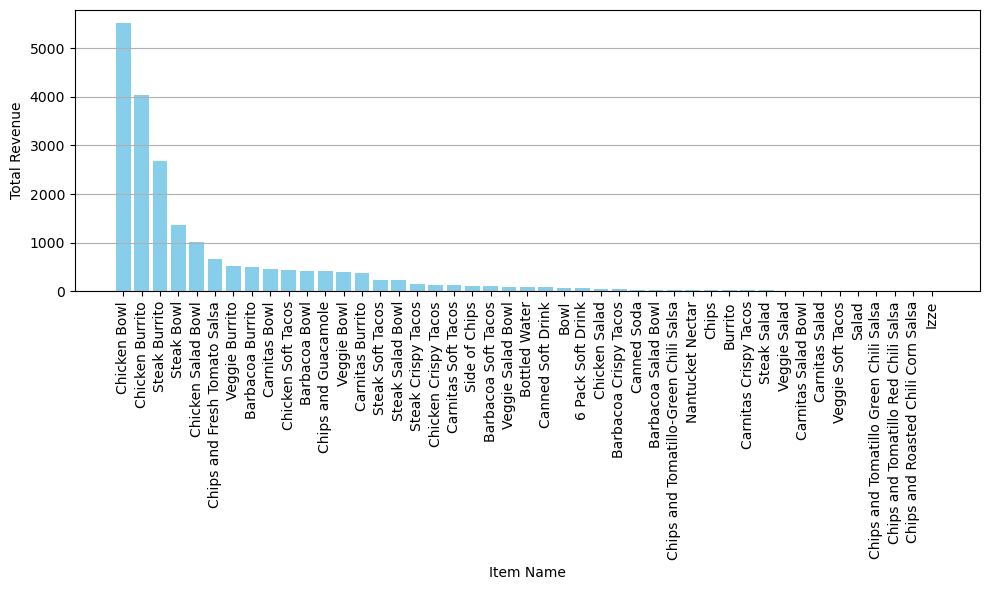

In [38]:
Item_Revenue = chipo.groupby('item_name').agg({'Revenue' : 'sum'}).sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Item Name")
plt.ylabel("Total Revenue")
plt.grid(axis='y')

plt.tight_layout()
plt.show()